In [1]:
from fastai.vision.all import *

In [2]:
%matplotlib inline
%reload_ext autoreload

In [3]:
import torch

if torch.cuda.is_available():
    print(True) 


True


In [4]:
%cd /home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class

/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class


In [5]:
from pathlib import Path
path = Path('.')

In [6]:
dls = ImageDataLoaders.from_folder(path, train='malformed_potatoes_fourier_2_class', valid_pct= 0.2, item_tfms=Resize(224), shuffle=True, bs=32, seed=42)

In [7]:
dls.valid_ds

(#49) [(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(0)),(PILImage mode=RGB size=640x640, TensorCategory(1)),(PILImage mode=RGB size=640x640, TensorCategory(1))...]

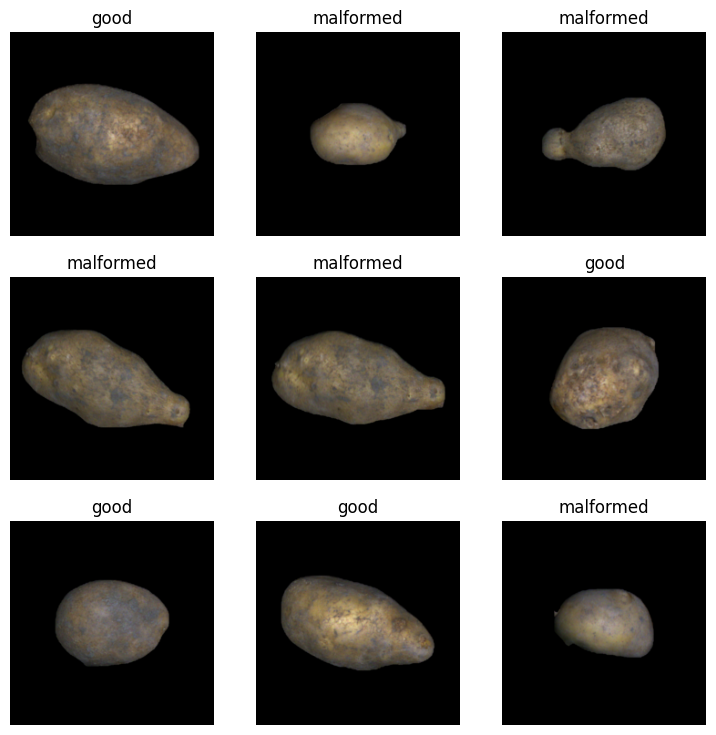

In [8]:
dls.show_batch()

In [9]:
learn = vision_learner(dls, resnet18, metrics=error_rate)

In [10]:
learn.fine_tune(10, base_lr=0.0002)

epoch,train_loss,valid_loss,error_rate,time


epoch,train_loss,valid_loss,error_rate,time
0,0.818237,0.599670,0.306122,00:05
1,0.718879,0.524565,0.265306,00:06
2,0.591594,0.339040,0.183673,00:06
3,0.483091,0.196497,0.081633,00:06
4,0.416499,0.147101,0.081633,00:05
5,0.344181,0.125458,0.061224,00:04
6,0.301748,0.118274,0.061224,00:05
7,0.265233,0.117214,0.061224,00:06
8,0.228139,0.112897,0.061224,00:06
9,0.199507,0.103065,0.061224,00:05


SuggestedLRs(valley=0.00010964782268274575)

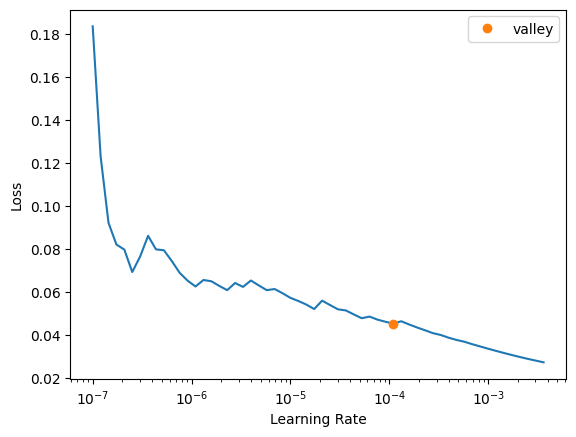

In [11]:
learn.lr_find()

In [12]:
learn.fine_tune(8, base_lr=0.00010964782268274575)

epoch,train_loss,valid_loss,error_rate,time
0,0.101234,0.104541,0.061224,00:03


epoch,train_loss,valid_loss,error_rate,time
0,0.062012,0.099694,0.040816,00:05
1,0.068104,0.106255,0.040816,00:05
2,0.067744,0.110348,0.040816,00:05
3,0.054557,0.107872,0.040816,00:05
4,0.048858,0.092169,0.040816,00:05
5,0.045345,0.091171,0.040816,00:05
6,0.042882,0.093074,0.040816,00:05
7,0.039166,0.097804,0.040816,00:05


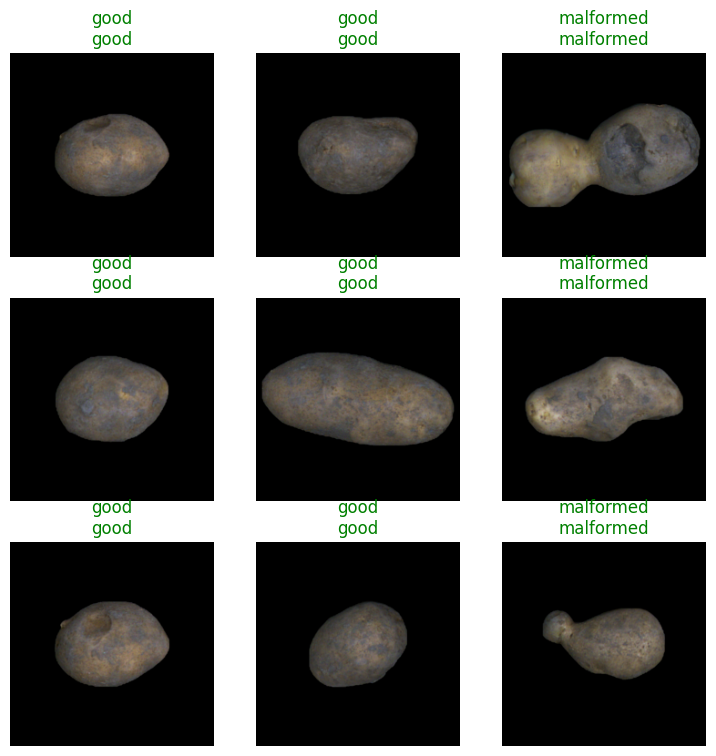

In [13]:
learn.show_results()

In [14]:
learn_accuracy = vision_learner(dls, resnet18, metrics=accuracy)

In [15]:
learn_accuracy.fine_tune(10, base_lr=0.0001)

epoch,train_loss,valid_loss,accuracy,time


epoch,train_loss,valid_loss,accuracy,time
0,1.260678,0.746682,0.571429,00:06
1,1.233562,0.605355,0.673469,00:05
2,1.119364,0.483594,0.775510,00:05
3,1.001302,0.396777,0.775510,00:06
4,0.863396,0.295209,0.877551,00:05
5,0.745089,0.237625,0.897959,00:05
6,0.646190,0.201789,0.897959,00:06
7,0.579818,0.183875,0.918367,00:05
8,0.526672,0.177008,0.918367,00:05
9,0.481962,0.171419,0.938776,00:06


SuggestedLRs(valley=5.248074739938602e-05)

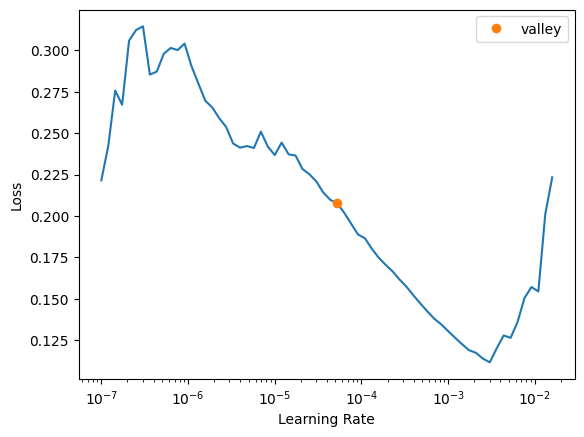

In [16]:
learn_accuracy.lr_find()

In [17]:
learn_accuracy.fine_tune(15, base_lr=5.248074739938602e-05)

epoch,train_loss,valid_loss,accuracy,time
0,0.336322,0.162624,0.918367,00:04


epoch,train_loss,valid_loss,accuracy,time
0,0.254992,0.150179,0.959184,00:05
1,0.251362,0.149025,0.938776,00:06
2,0.239847,0.140369,0.918367,00:06
3,0.218389,0.125701,0.979592,00:06
4,0.213955,0.110263,0.979592,00:05
5,0.212052,0.103665,0.979592,00:05
6,0.197103,0.092562,0.979592,00:06
7,0.189913,0.086205,0.979592,00:05
8,0.175483,0.086090,0.979592,00:05
9,0.163963,0.085281,0.979592,00:06


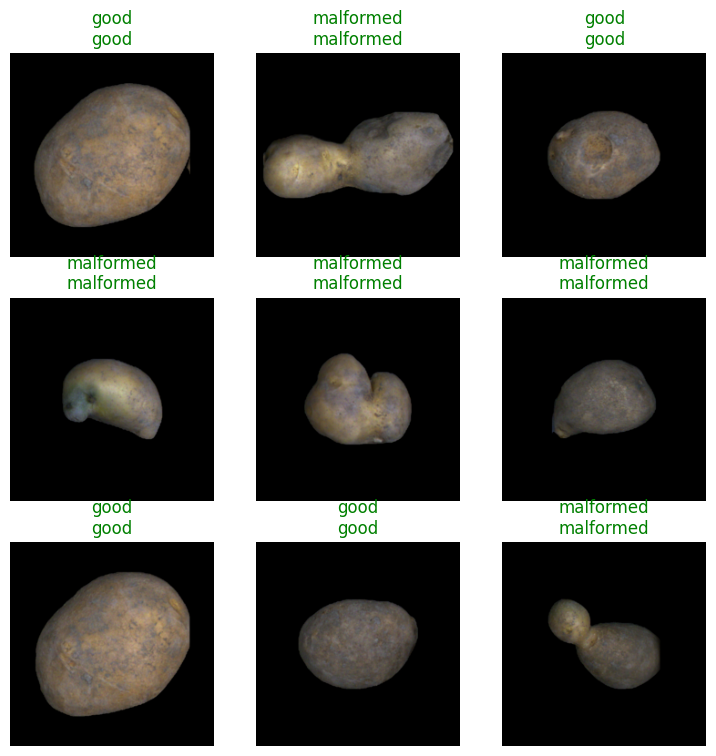

In [18]:
learn_accuracy.show_results()

In [20]:
# learn.predict('/home/mishkat/Downloads/potato_good_malformed/girl.png')
learn.predict("/home/mishkat/Downloads/potato_good_malformed/int_potato.jpg")

('malformed', tensor(1), tensor([0.4603, 0.5397]))

In [22]:
learn_accuracy.export("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/export_2_class_80_20.pkl")

In [ ]:
# To load the model and run prediction
load_saved_model = load_learner("/home/mishkat/Downloads/potato_good_malformed/malformed_potatoes_fourier_2_class/models/export_2_class_80_20.pkl")

In [ ]:
load_saved_model.predict()